In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  
Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')
Mean Squared Error: 196514128.8187889
R^2 Score: 0.9729083242793309


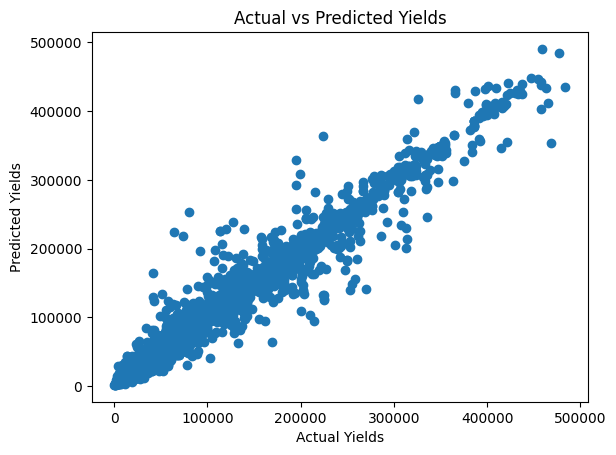

In [2]:
# Load dataset
df=pd.read_csv('/content/RS-A1_yield.csv')
print(df.head(5))
print(df.columns)
# Handle missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat=SimpleImputer(strategy='most_frequent')
df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']] = imputer_num.fit_transform(df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']])
df[['Area','Item']] = imputer_cat.fit_transform(df[['Area','Item']])
# Encode categorical variables
le_area=LabelEncoder()
le_item=LabelEncoder()
df['Item']=le_item.fit_transform(df['Item'])
df['Area']=le_area.fit_transform(df['Area'])
# Define features and target variable
x=df[['Area','Item','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']]
y=df['hg/ha_yield']
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Yields")
plt.ylabel("Predicted Yields")
plt.title("Actual vs Predicted Yields")
plt.show()

In [3]:
X_train_images = np.random.rand(100, 64, 64, 3) # Random 100 RGB images
y_train_images = np.random.randint(2, size=100) # Random binary labels (0: Healthy, 1: Diseased)
# CNN Model for Disease Detection
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification
# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the CNN model (using mock data, real images should be used in practice)
cnn_model.fit(X_train_images, y_train_images, epochs=5, batch_size=10, verbose=1)
# Evaluate the CNN model
loss, accuracy = cnn_model.evaluate(X_train_images, y_train_images, verbose=0)
print(f"CNN Model Accuracy: {accuracy}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.4139 - loss: 4.3423
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5416 - loss: 0.7464
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4527 - loss: 0.8368
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4703 - loss: 0.6986
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5530 - loss: 0.6723
CNN Model Accuracy: 0.5299999713897705


In [4]:
from google.colab import files

print("Please upload an image file for disease detection:")
uploaded_files = files.upload()

# Get the filename of the first uploaded image
if uploaded_files:
    filename = next(iter(uploaded_files))
    print(f"Uploaded file: {filename}")
else:
    print("No file was uploaded.")

Please upload an image file for disease detection:


Saving 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204.JPG to 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204.JPG
Uploaded file: 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204.JPG


In [5]:
from PIL import Image

if 'filename' in locals() and filename:
    try:
        # Open the image
        img = Image.open(filename)

        # Resize the image to 64x64
        img = img.resize((64, 64))

        # Convert to RGB (if not already)
        img = img.convert('RGB')

        # Convert image to numpy array and normalize pixel values
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]

        # Add batch dimension (1, 64, 64, 3) for the model
        img_array = np.expand_dims(img_array, axis=0)

        print(f"Processed image shape: {img_array.shape}")

        # Make prediction using the CNN model
        prediction = cnn_model.predict(img_array)

        # Interpret the prediction
        if prediction[0][0] > 0.5:
            status = "Diseased"
        else:
            status = "Healthy"

        print(f"The uploaded crop is predicted to be: {status} (confidence: {prediction[0][0]:.4f})")

    except Exception as e:
        print(f"Error processing image: {e}")
else:
    print("No image file found for processing. Please upload an image first.")

Processed image shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
The uploaded crop is predicted to be: Diseased (confidence: 0.5057)


In [6]:
print("Please enter the following values for crop yield prediction:")

# Get user input for Area and Item
user_area = input("Enter Area (e.g., India, China): ")
user_item = input("Enter Item (e.g., Maize, Wheat): ")

# Get user input for numerical features and convert to float
try:
    user_rain_fall = float(input("Enter average_rain_fall_mm_per_year: "))
    user_pesticides = float(input("Enter pesticides_tonnes: "))
    user_avg_temp = float(input("Enter avg_temp: "))
except ValueError:
    print("Invalid input for numerical fields. Please enter numbers.")
    user_rain_fall = None
    user_pesticides = None
    user_avg_temp = None

if all([user_rain_fall is not None, user_pesticides is not None, user_avg_temp is not None]):
    print("\nUser Inputs:")
    print(f"Area: {user_area}")
    print(f"Item: {user_item}")
    print(f"Average Rain Fall (mm/year): {user_rain_fall}")
    print(f"Pesticides (tonnes): {user_pesticides}")
    print(f"Average Temperature: {user_avg_temp}")
else:
    print("Input collection failed due to invalid numerical entries.")

Please enter the following values for crop yield prediction:
Enter Area (e.g., India, China): India
Enter Item (e.g., Maize, Wheat): Wheat
Enter average_rain_fall_mm_per_year: 1720
Enter pesticides_tonnes: 126
Enter avg_temp: 20

User Inputs:
Area: India
Item: Wheat
Average Rain Fall (mm/year): 1720.0
Pesticides (tonnes): 126.0
Average Temperature: 20.0


In [7]:
if all([user_rain_fall is not None, user_pesticides is not None, user_avg_temp is not None]):
    try:
        # Encode categorical inputs
        encoded_area = le_area.transform([user_area])[0]
        encoded_item = le_item.transform([user_item])[0]

        # Create a DataFrame for prediction, matching the structure of x_train
        user_input_df = pd.DataFrame({
            'Area': [encoded_area],
            'Item': [encoded_item],
            'average_rain_fall_mm_per_year': [user_rain_fall],
            'pesticides_tonnes': [user_pesticides],
            'avg_temp': [user_avg_temp]
        })

        # Predict yield
        predicted_yield = rf.predict(user_input_df)

        print(f"\nPredicted Crop Yield (hg/ha): {predicted_yield[0]:.2f}")

    except ValueError as e:
        print(f"Error: One or more categorical inputs ('Area' or 'Item') are not recognized by the model. Please check your spelling or input an area/item that was part of the training data. Details: {e}")
    except Exception as e:
        print(f"An unexpected error occurred during prediction: {e}")
else:
    print("Cannot predict yield due to missing or invalid numerical inputs.")


Predicted Crop Yield (hg/ha): 16560.81


In [ ]:
"""
# --- Step 3: Recommendation System --
# ==============================================
def recommend(disease_prediction, yield_prediction):
  if disease_prediction >= 0.5:
    return "Disease detected! Recommended action: Apply pesticide."
  elif yield_prediction < 50:
    return "Low yield predicted! Recommended action: Improve irrigation and soil quality."
  else:
    return "Crop is healthy and yield prediction is optimal."


# --- Step 4: Testing the System --
# ==============================================
import random, os
from keras.preprocessing import image
test_class = random.choice(['healthy', 'diseased'])
test_dir = os.path.join(dataset_path, test_class)
test_img_path = '/content/Gemini_Generated_Image_lxa0l3lxa0l3lxa0.png'

img = image.load_img(test_img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# CNN prediction
disease_prediction = cnn_model.predict(img_array)[0][0]
# Simulated environmental data for yield model
test_env_data = np.array([[0.8, 0.6, 0.7]])  # rainfall, temp, soil quality
yield_prediction = yield_model.predict(test_env_data)[0]
# Generate recommendation
recommendation = recommend(disease_prediction, yield_prediction)

"""